## Fast.ai Deep Learning 1 Practice - MNIST handwritten digit dataset

This notebook is more image classification practice using the [MNSIT handwritten digit dataset](http://yann.lecun.com/exdb/mnist/).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [12]:
path = Path('/path/to/dataset/mnist_png/')

In [13]:
tfms = get_transforms(do_flip=False)

In [15]:
data = ImageDataBunch.from_folder(path, 'training', valid_pct=0.2, ds_tfms=tfms, size=28)

In [16]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

The classes pulled from the folder names appear correct. Validation set at 20% of training set.

In [20]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(8)

epoch     train_loss  valid_loss  accuracy  time    
0         0.493689    0.345635    0.891786  00:19     
1         0.265640    0.188141    0.942571  00:18     
2         0.214027    0.112174    0.966071  00:18     
3         0.150334    0.095334    0.969857  00:18     
4         0.130539    0.076022    0.976429  00:19     
5         0.119524    0.065669    0.979286  00:20     
6         0.117691    0.056686    0.982714  00:20     
7         0.104834    0.054614    0.982643  00:19     


epoch     train_loss  valid_loss  accuracy  time    
0         0.295935    #na#        00:02     
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/home/user/anaconda3/envs/deep-learning/lib/python3.7/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


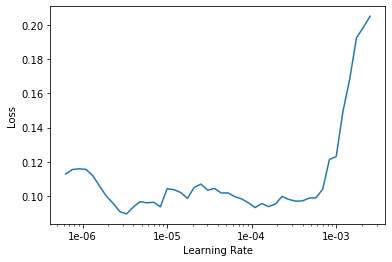

In [21]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(8, max_lr=slice(1e-5, 1e-4))

epoch     train_loss  valid_loss  accuracy  time    
0         0.034844    0.031408    0.989429  00:22     
1         0.052278    0.032709    0.989500  00:21     
2         0.046456    0.029644    0.991000  00:22     
3         0.040125    0.029558    0.991071  00:23     
4         0.030442    0.028939    0.991500  00:22     
5         0.026508    0.025404    0.992286  00:22     
6         0.026493    0.025172    0.992571  00:22     
7         0.027934    0.024381    0.993286  00:22     


In [25]:
learn.save('stage1-18')

In [30]:
# Trying slightly different learning rate

learn.fit_one_cycle(9, max_lr=slice(1e-5, 5e-4))

epoch     train_loss  valid_loss  accuracy  time    
0         0.025883    0.027215    0.992143  00:21     
1         0.037168    0.032086    0.990286  00:22     
2         0.041878    0.029454    0.991000  00:22     
3         0.035175    0.025457    0.992643  00:22     
4         0.026416    0.025246    0.992786  00:23     
5         0.025642    0.024500    0.993214  00:22     
6         0.019702    0.022390    0.994000  00:22     
7         0.015216    0.021587    0.994571  00:22     
8         0.010844    0.020889    0.994357  00:22     


In [31]:
learn.save('stage2-18')

## Trying out resnet34

In [32]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit(8)

epoch     train_loss  valid_loss  accuracy  time    
0         0.389085    0.267943    0.914143  00:26     
1         0.218107    0.135804    0.956929  00:27     
2         0.153944    0.108720    0.966571  00:27     
3         0.125937    0.082092    0.975429  00:27     
4         0.100322    0.069678    0.979786  00:27     
5         0.102003    0.061811    0.981214  00:27     
6         0.078045    0.061167    0.980286  00:27     
7         0.066684    0.053654    0.983357  00:27     


epoch     train_loss  valid_loss  accuracy  time    
0         0.104846    #na#        00:02     
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/home/user/anaconda3/envs/deep-learning/lib/python3.7/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


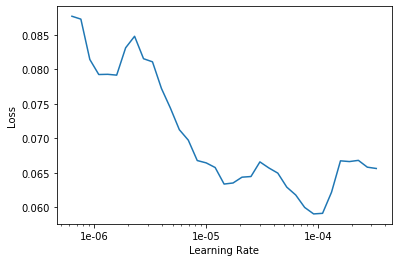

In [33]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(8, max_lr=slice(1e-5, 1e-4))

epoch     train_loss  valid_loss  accuracy  time    
0         0.068915    0.042752    0.986286  00:32     
1         0.057852    0.039378    0.987000  00:32     
2         0.057676    0.037659    0.988071  00:32     
3         0.039961    0.029623    0.991286  00:33     
4         0.028113    0.027793    0.991857  00:32     
5         0.021407    0.026449    0.992643  00:32     
6         0.023843    0.024059    0.993071  00:33     
7         0.018161    0.024289    0.993571  00:32     
